In [76]:
# Import statements
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# This is taken from the base solution - THIS IS NOT MY WORK 

def read_texts_from_dir(dir_path):
  """
  Reads the texts from a given directory and saves them in the pd.DataFrame with columns ['id', 'file_1', 'file_2'].

  Params:
    dir_path (str): path to the directory with data
  """
  # Count number of directories in the provided path
  dir_count = sum(os.path.isdir(os.path.join(root, d)) for root, dirs, _ in os.walk(dir_path) for d in dirs)
  data=[0 for _ in range(dir_count)]
  print(f"Number of directories: {dir_count}")

  # For each directory, read both file_1.txt and file_2.txt and save results to the list
  i=0
  for folder_name in sorted(os.listdir(dir_path)):
    folder_path = os.path.join(dir_path, folder_name)
    if os.path.isdir(folder_path):
      try:
        with open(os.path.join(folder_path, 'file_1.txt'), 'r', encoding='utf-8') as f1:
          text1 = f1.read().strip()
        with open(os.path.join(folder_path, 'file_2.txt'), 'r', encoding='utf-8') as f2:
          text2 = f2.read().strip()
        index = int(folder_name[-4:])
        data[i]=(index, text1, text2)
        i+=1
      except Exception as e:
        print(f"Error reading directory {folder_name}: {e}")

  # Change list with results into pandas DataFrame
  df = pd.DataFrame(data, columns=['id', 'file_1', 'file_2']).set_index('id')
  return df

In [ ]:
train_dir = "data/train/"
data = []

i = 0 
for dirpath, dirnames, filenames in sorted(os.walk(train_dir)): 
    if i == 0:
        i += 1
        continue 

    try:
        with open(os.path.join(dirpath, filenames[0]), 'r', encoding='utf-8') as f1:
            text1 = f1.read().strip()
        with open(os.path.join(dirpath, filenames[1]), 'r', encoding='utf-8') as f2:
            text2 = f2.read().strip()
        data.append((text1, text2))
    except Exception as e:
        print(f"Error reading directory {dirpath}: {e}")
    
    i += 1 

train_df = pd.DataFrame(data, columns=['file_1', 'file_2'])
train_df.head()

,file_1,file_2
0,The VIRSA (Visible Infrared Survey Telescope A...,The China relay network has released a signifi...
1,China\nThe goal of this project involves achie...,The project aims to achieve an accuracy level ...
2,Scientists can learn about how galaxies form a...,Dinosaur eggshells offer clues about what dino...
3,China\nThe study suggests that multiple star s...,The importance for understanding how stars evo...
4,Dinosaur Rex was excited about his new toy set...,Analyzing how fast stars rotate within a galax...


In [84]:
label_file = "data/train.csv"
label_data = pd.read_csv(label_file)

real_msg_lengths = []
fake_msg_lengths = []

for index, row in train_df.iterrows():
    file_1, file_2 = row["file_1"], row["file_2"]
    file_1_len = len(file_1)
    file_2_len = len(file_2)
    print(f"Length of File 1: {file_1_len}, Length of File 2: {file_2_len}")

    if label_data['real_text_id'][index] == 1:
        real_msg_lengths.append(file_1_len)
        fake_msg_lengths.append(file_2_len)
    else:
        real_msg_lengths.append(file_2_len)
        fake_msg_lengths.append(file_1_len)



Length of File 1: 2196, Length of File 2: 2018
Length of File 1: 3124, Length of File 2: 936
Length of File 1: 1139, Length of File 2: 801
Length of File 1: 1774, Length of File 2: 1869
Length of File 1: 195, Length of File 2: 871
Length of File 1: 1364, Length of File 2: 1498
Length of File 1: 1197, Length of File 2: 906
Length of File 1: 1435, Length of File 2: 1008
Length of File 1: 887, Length of File 2: 592
Length of File 1: 1030, Length of File 2: 1218
Length of File 1: 1857, Length of File 2: 0
Length of File 1: 1246, Length of File 2: 874
Length of File 1: 1648, Length of File 2: 285
Length of File 1: 1333, Length of File 2: 1683
Length of File 1: 0, Length of File 2: 1788
Length of File 1: 912, Length of File 2: 672
Length of File 1: 1216, Length of File 2: 69
Length of File 1: 1788, Length of File 2: 1118
Length of File 1: 1385, Length of File 2: 2544
Length of File 1: 1444, Length of File 2: 1833
Length of File 1: 1903, Length of File 2: 1068
Length of File 1: 1827, Length o

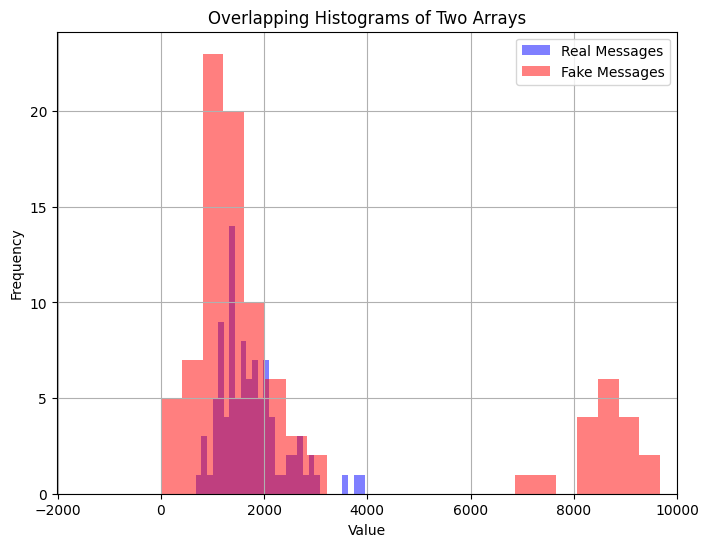

In [91]:
# Create the figure and axes for the plot
plt.figure(figsize=(8, 6))

# Plot the first histogram
plt.hist(real_msg_lengths, bins=30, alpha=0.5, label='Real Messages', color='blue')

# Plot the second histogram
plt.hist(fake_msg_lengths, bins=100, alpha=0.5, label='Fake Messages', color='red')

# Add labels and title for clarity
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Overlapping Histograms of Two Arrays')
plt.xlim(right=10000)
plt.legend() # Display the legend to differentiate the histograms
plt.grid(True) # Add a grid for better readability

# Show the plot
plt.show()

### Basic Evaluation Metrics

In [69]:
count = 95

label_file = "data/train.csv"
label_data = pd.read_csv(label_file)

for index, row in label_data.iterrows():
    if row['real_text_id'] != classifications[index]:
        count -= 1

print(count/len(classifications)*100)

57.89473684210527
